# MODEL 1: PORTUGUESE SCORES CLASSIFICATION WITH MIDTERM SCORES

# PART A: DATA LOADING, SETUP, TRANSFORMATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib
#import seaborn as sns 
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import make_moons
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## 1a. DATA TRANSFORMATION

In [2]:
# initiate path and load data
path_to_data = "/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project_-portugese-secondary-student-performance/data/student"
df = pd.read_csv(path_to_data+'/student-por.csv', sep=";")
print("number of points and features in the data", df.shape)
df.head(5)

number of points and features in the data (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
# convert final_score to categorical variable 
df['pass_fail'] = 'na'
df.loc[(df.G3 >= 10), 'pass_fail'] = 'pass' 
df.loc[(df.G3 < 10), 'pass_fail'] = 'fail' 
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,pass


In [4]:
# drop final score column because we don't use it
df.drop(columns=['G3'], inplace=True)
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,pass


## 1b. SEPARATE FEATURE AND TARGET VARIABLE

In [5]:
# separate feature matrix and target variable
label = 'pass_fail'
y = LabelEncoder().fit_transform(df[label]) #apply label encoder to the target variable
df.drop(columns=[label],inplace=True)
X = df
ftr_names = X.columns
print(X.head())
print(y)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  romantic famrel  freetime  goout  Dalc Walc health absences  G1  G2  
0       no      4         3      4     1    1      3        4   0  11  
1       no      5         3      3     1    1      3        2   9  11  
2       no      4         3      2     2    3      3        6  12  13  
3      yes      3         2      2     1    1      5        0  14  14  
4       no      4         3      2     1    2      5        0  11  13  

[5 rows x 32 columns]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1

## 1c. CHECK BALANCE

In [6]:
classes, counts = np.unique(y,return_counts=True)
print('balance:',np.max(counts/len(y)))

balance: 0.8459167950693375


# PART B: MACHINE LEARNING MODELS & PIPELINE

# 1. Logistic Regression

## 1a. HYPERPARAMETER TUNING

In [7]:
def ML_pipeline_kfold_GridSearchCV_logreg(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # KFold splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    # encoders
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences','G1','G2']
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # make ML pipeline
    pipe = make_pipeline(preprocessor, LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state = 20))

    # the parameter(s) we want to tune
    param_grid = {'logisticregression__C': np.logspace(-2,2, num=8)} 
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    # get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [8]:
import pickle
test_scores = []

for i in range(10):
    print('random state '+str(i+1)) 
    grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_logreg(X,y,i*42, 5)
    print(grid.best_params_)
    print(i)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    
    # save the output so I can use it later
    fname = '../results/allpor/logreg/allpor_logreg_pipeline'+str(i)+'.save'
    file = open(fname, 'wb')
    pickle.dump((grid, X_test,y_test), file)
    file.close()
    
    test_scores.append(test_score)
    
mean_test_scores = np.around(np.mean(test_scores),2)
std_test_scores = np.around(np.std(test_scores),2)
print('test accuracy:',mean_test_scores ,'+/-',std_test_scores)

random state 1
{'logisticregression__C': 0.517947467923121}
0
best CV score: 0.9190440627333831
test score: 0.9461538461538461
random state 2
{'logisticregression__C': 1.9306977288832496}
1
best CV score: 0.9247759522031366
test score: 0.9230769230769231
random state 3
{'logisticregression__C': 7.196856730011514}
2
best CV score: 0.9364264376400298
test score: 0.9307692307692308
random state 4
{'logisticregression__C': 1.9306977288832496}
3
best CV score: 0.9210791635548917
test score: 0.9307692307692308
random state 5
{'logisticregression__C': 1.9306977288832496}
4
best CV score: 0.9171209858103062
test score: 0.9692307692307692
random state 6
{'logisticregression__C': 0.517947467923121}
5
best CV score: 0.9325989544436146
test score: 0.9076923076923077
random state 7
{'logisticregression__C': 1.9306977288832496}
6
best CV score: 0.915216579536968
test score: 0.9461538461538461
random state 8
{'logisticregression__C': 7.196856730011514}
7
best CV score: 0.9325802837938759
test score: 

In [10]:
# run pipeline on the best iteration
grid, test_score, feature_names, X_test, y_test= ML_pipeline_kfold_GridSearchCV_logreg(X,y,4*42,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

0.9171209858103062
0.9692307692307692
{'logisticregression__C': 1.9306977288832496}


In [11]:
# save the output so I can use it later
fname = '../results/allpor/logreg/allpor_logreg_bestmodel_score'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

## 1b. FEATURE IMPORTANCE

## 1bi. PERTURBATION

In [13]:
# load saved data
import pickle
fname = '../results/allpor/logreg/allpor_logreg_pipeline'+str(i)+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [14]:
np.random.seed(42) #fixed random state in numpy
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

print('test score = ',mean_test_scores)
print('test baseline = ',np.sum(y == 1)/len(y))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.93
test baseline =  0.8459167950693375
shuffling school
   shuffled test score: 0.934 +/- 0.009
shuffling sex
   shuffled test score: 0.923 +/- 0.005
shuffling age
   shuffled test score: 0.931 +/- 0.007
shuffling address
   shuffled test score: 0.918 +/- 0.004
shuffling famsize
   shuffled test score: 0.923 +/- 0.0
shuffling Pstatus
   shuffled test score: 0.923 +/- 0.0
shuffling Medu
   shuffled test score: 0.923 +/- 0.0
shuffling Fedu
   shuffled test score: 0.923 +/- 0.0
shuffling Mjob
   shuffled test score: 0.93 +/- 0.009
shuffling Fjob
   shuffled test score: 0.923 +/- 0.0
shuffling reason
   shuffled test score: 0.928 +/- 0.005
shuffling guardian
   shuffled test score: 0.923 +/- 0.0
shuffling traveltime
   shuffled test score: 0.923 +/- 0.0
shuffling studytime
   shuffled test score: 0.923 +/- 0.0
shuffling failures
   shuffled test score: 0.923 +/- 0.0
shuffling schoolsup
   shuffled test score: 0.916 +/- 0.002
shuffling famsup
   shuffled test score: 0.923 +/

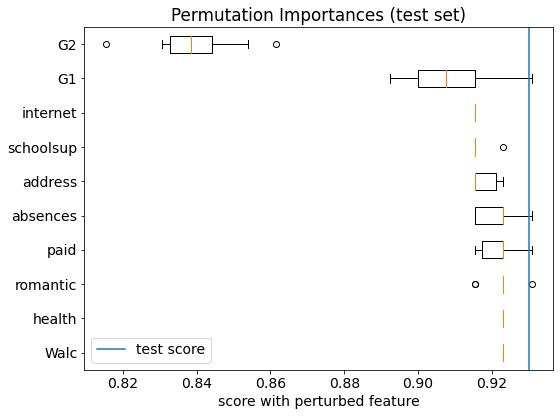

In [15]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1] #order features by how important they are - by how much accuracy score has reduced 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(mean_test_scores,label='test score') #original test score
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

## 1bii. COEFFICIENTS

In [16]:
def ML_pipeline_kfold_GridSearchCV_logreg_ftimp(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # StratifiedKFold
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    #encoders 
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences', 'G1', 'G2']
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # Standard Scaler to standardized
    final_scaler = StandardScaler()
    
    #make pipeline with Standard Scaler
    pipe = make_pipeline(preprocessor, final_scaler, LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state = 20))

    # the parameter(s) we want to tune
    param_grid = {'logisticregression__C': np.logspace(-2,2, num=8)} 
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    #get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [17]:
grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_logreg_ftimp(X,y,42, 5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

0.938293502613891
0.9153846153846154
{'logisticregression__C': 0.517947467923121}


In [19]:
# save the output so I can use it later
fname = '../results/allpor/logreg/allpor_logreg_coeff'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

In [20]:
# load saved data
import pickle
fname = '../results/allmath/logreg/allmath_logreg_coeff'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

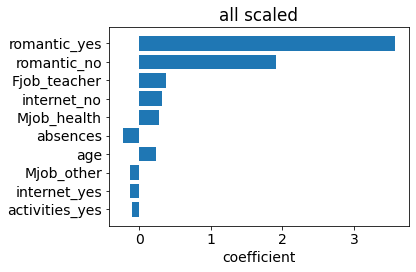

In [21]:
coefs = grid.best_estimator_[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('coefficient')
plt.title('all scaled')
plt.tight_layout()
#plt.savefig('figures/LR_coefs_scaled.png',dpi=300)
plt.show()

## 1biii. SHAP

In [25]:
grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_logreg(X,y,42, 5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

0.9247759522031366
0.9230769230769231
{'logisticregression__C': 1.9306977288832496}


In [26]:
# save the output so I can use it later
fname = '../results/allpor/logreg/allpor_logreg_use'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

In [27]:
# load saved data
import pickle
fname = '../results/allmath/logreg/allmath_logreg_use'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [28]:
import shap
shap.initjs() # required for visualizations later on
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# create explainer
explainer = shap.LinearExplainer(grid.best_estimator_[1], X_test_transformed)
# calculate shap values
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))

(130, 47)
(130, 47)


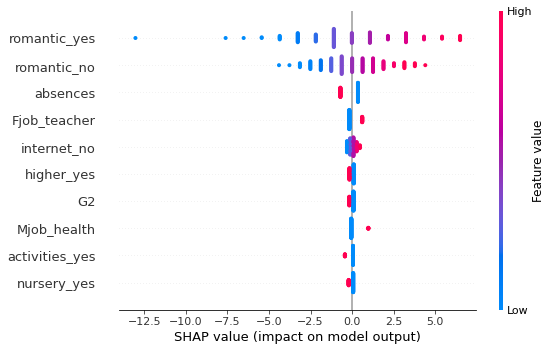

In [29]:
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, max_display=10)

In [30]:
ind = 0
print(explainer.expected_value)
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_transformed[ind,:],
    feature_names=feature_names
)

5.974531278420018


In [31]:
ind = 25
print(explainer.expected_value)
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_transformed[ind,:],
    feature_names=feature_names
)

5.974531278420018


In [32]:
ind = 50
print(explainer.expected_value)
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_transformed[ind,:],
    feature_names=feature_names
)

5.974531278420018


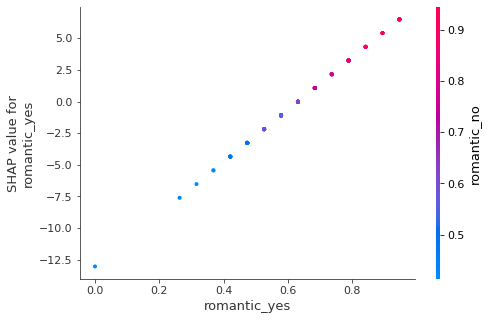

In [33]:
ftr = 'romantic_yes'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names)

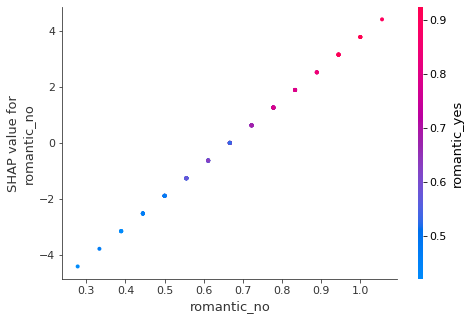

In [34]:
ftr = 'romantic_no'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names)

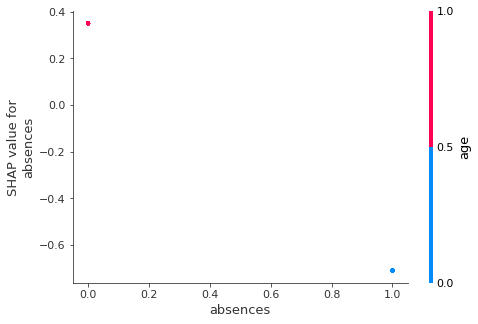

In [35]:
ftr = 'absences'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names)

## 1c. CONFUSION MATRIX

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [90]:
#load saved data
import pickle
fname = '../results/allpor/logreg/allpor_logreg_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

confusion matrix : [[ 15   2]
 [  2 111]]


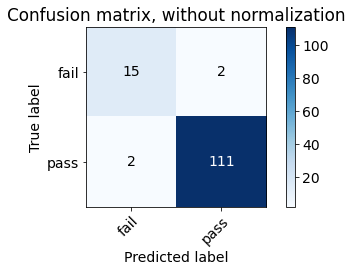

normalized confusion matrix : [[0.88235294 0.11764706]
 [0.01769912 0.98230088]]


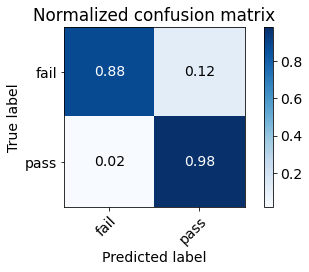

In [91]:
y_pred = grid.best_estimator_.predict(X_test)
# not-normalized
conf_mat = confusion_matrix(y_test, y_pred)
print("confusion matrix :", conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'])
plt.show()

# normalized
norm_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("normalized confusion matrix :",norm_conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'],normalize= True )
plt.show()

# 2. RANDOM FOREST CLASSIFIER

## 2a. HYPERPARAMETER TUNING

In [39]:
def ML_pipeline_kfold_GridSearchCV_rf(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # KFold splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    # encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences','G1','G2']
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # make ML pipeline
    pipe = make_pipeline(preprocessor, RandomForestClassifier(n_estimators = 200,random_state=random_state))

    # the parameter(s) we want to tune
    param_grid = {'randomforestclassifier__max_depth': range(1,40,5),
                  'randomforestclassifier__min_samples_split': range(2,20,5),
                 'randomforestclassifier__max_features': [0.5,0.75,1.0]} 
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    # get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [40]:
import pickle
test_scores = []

for i in range(10):
    print('random state '+str(i+1)) 
    grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_rf(X,y,i*42, 5)
    print(grid.best_params_)
    print(i)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    
    # save the output so I can use it later
    fname = '../results/allpor/rf/allpor_rf_pipeline'+str(i)+'.save'
    file = open(fname, 'wb')
    pickle.dump((grid, X_test,y_test), file)
    file.close()
    
    test_scores.append(test_score)

mean_test_scores = np.around(np.mean(test_scores),2)
std_test_scores = np.around(np.std(test_scores),2)
print('test accuracy:',mean_test_scores ,'+/-',std_test_scores)

random state 1
{'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 0.75, 'randomforestclassifier__min_samples_split': 17}
0
best CV score: 0.9325242718446602
test score: 0.9307692307692308
random state 2
{'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 1.0, 'randomforestclassifier__min_samples_split': 2}
1
best CV score: 0.9363517550410755
test score: 0.9307692307692308
random state 3
{'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 0.5, 'randomforestclassifier__min_samples_split': 2}
2
best CV score: 0.9384241971620613
test score: 0.8769230769230769
random state 4
{'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 1.0, 'randomforestclassifier__min_samples_split': 2}
3
best CV score: 0.9403286034353997
test score: 0.9230769230769231
random state 5
{'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 0.75, 'randomforestclassifier__min_sam

In [41]:
# run pipeline on the best iteration
grid, test_score, feature_names, X_test, y_test= ML_pipeline_kfold_GridSearchCV_rf(X,y,4*42,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

0.9287528005974608
0.9615384615384616
{'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 0.75, 'randomforestclassifier__min_samples_split': 2}


In [42]:
# save the output so I can use it later
fname = '../results/allpor/rf/allpor_rf_bestmodel_score'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

## 2b. FEATURE IMPORTANCE

## 2bi. PERTURBATION

In [43]:
# load saved data
import pickle
fname = '../results/allpor/rf/allpor_rf_pipeline'+str(i)+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [44]:
np.random.seed(42) #fixed random state in numpy
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

print('test score = ',mean_test_scores)
print('test baseline = ',np.sum(y == 1)/len(y))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.93
test baseline =  0.8459167950693375
shuffling school
   shuffled test score: 0.954 +/- 0.0
shuffling sex
   shuffled test score: 0.954 +/- 0.0
shuffling age
   shuffled test score: 0.954 +/- 0.0
shuffling address
   shuffled test score: 0.954 +/- 0.0
shuffling famsize
   shuffled test score: 0.954 +/- 0.0
shuffling Pstatus
   shuffled test score: 0.954 +/- 0.0
shuffling Medu
   shuffled test score: 0.954 +/- 0.0
shuffling Fedu
   shuffled test score: 0.954 +/- 0.0
shuffling Mjob
   shuffled test score: 0.954 +/- 0.0
shuffling Fjob
   shuffled test score: 0.954 +/- 0.0
shuffling reason
   shuffled test score: 0.954 +/- 0.0
shuffling guardian
   shuffled test score: 0.954 +/- 0.0
shuffling traveltime
   shuffled test score: 0.954 +/- 0.0
shuffling studytime
   shuffled test score: 0.954 +/- 0.0
shuffling failures
   shuffled test score: 0.954 +/- 0.0
shuffling schoolsup
   shuffled test score: 0.954 +/- 0.0
shuffling famsup
   shuffled test score: 0.954 +/- 0.0
shuffli

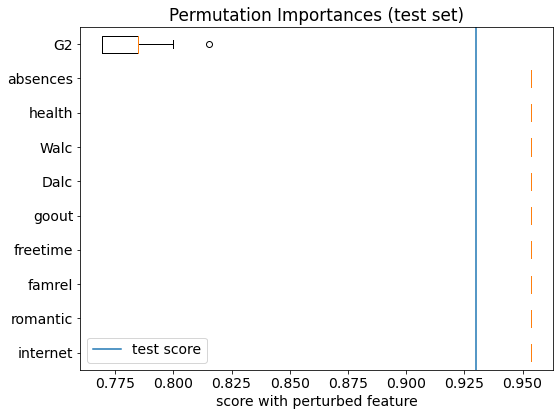

In [45]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1] #order features by how important they are - by how much accuracy score has reduced 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(mean_test_scores,label='test score') #original test score
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

## 2bii. DECISION TREE-NATIVE FEATURE IMPORTANCES METRICS

In [46]:
grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_rf(X,y,42, 5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

0.9363517550410755
0.9307692307692308
{'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 1.0, 'randomforestclassifier__min_samples_split': 2}


In [47]:
# save the output so I can use it later
fname = '../results/allpor/rf/allpor_rf_dtft'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

In [48]:
# load saved data
import pickle
fname = '../results/allpor/rf/allpor_rf_dtft'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

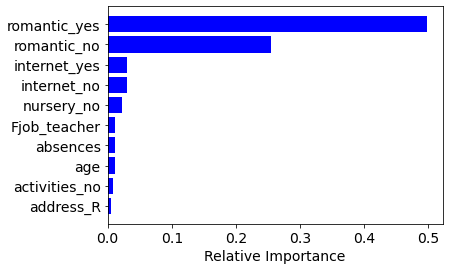

In [49]:
importances = grid.best_estimator_[1].feature_importances_
indices = np.argsort(importances)[-10:]
features = feature_names
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 2biii. SHAP

In [50]:
grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_rf(X,y,42, 5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

0.9363517550410755
0.9307692307692308
{'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 1.0, 'randomforestclassifier__min_samples_split': 2}


In [51]:
# save the output so I can use it later
import pickle
fname = '../results/allpor/rf/allpor_rf_use'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

In [52]:
# load saved data
fname = '../results/allpor/rf/allpor_rf_use'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [53]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values 
shap_values = explainer.shap_values(X_test_transformed,check_additivity=False)
print(np.shape(shap_values))

(130, 47)
(2, 130, 47)


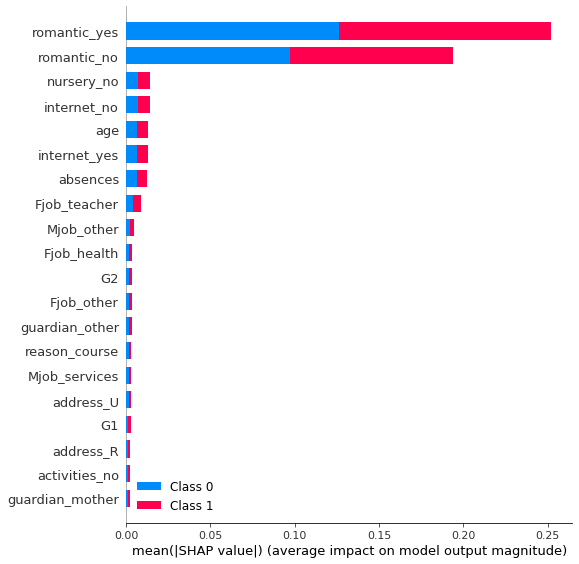

In [54]:
shap.summary_plot(shap_values, X_test_transformed,feature_names = feature_names)

In [55]:
index = 0 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.1634007707129095


In [56]:
index = 25 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.1634007707129095


In [57]:
index = 50 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.1634007707129095


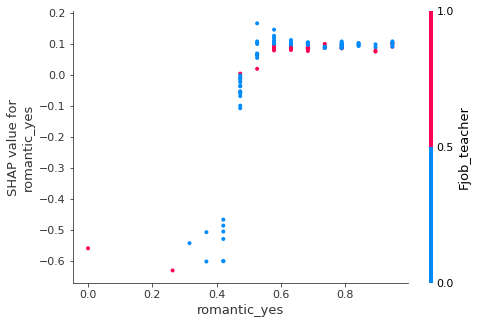

In [58]:
ftr = 'romantic_yes'
shap.dependence_plot(ftr, shap_values[1], X_test_transformed, feature_names=feature_names)

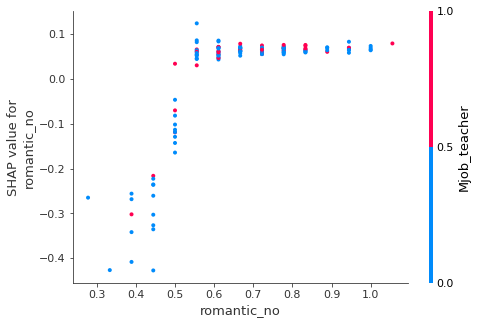

In [59]:
ftr = 'romantic_no'
shap.dependence_plot(ftr, shap_values[1], X_test_transformed, feature_names=feature_names)

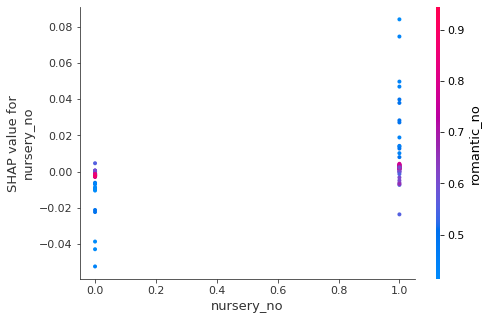

In [60]:
ftr = 'nursery_no'
shap.dependence_plot(ftr, shap_values[1], X_test_transformed, feature_names=feature_names)

## 2c. CONFUSION MATRIX

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [88]:
# load saved data
import pickle
fname = '../results/allpor/rf/allpor_rf_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

confusion matrix : [[ 13   4]
 [  1 112]]


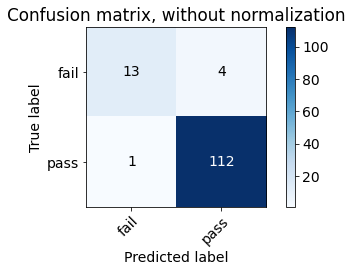

normalized confusion matrix : [[0.76470588 0.23529412]
 [0.00884956 0.99115044]]


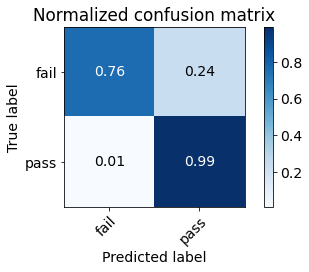

In [89]:
y_pred = grid.best_estimator_.predict(X_test)
# not-normalized
conf_mat = confusion_matrix(y_test, y_pred)
print("confusion matrix :", conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'])
plt.show()

# normalized
norm_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("normalized confusion matrix :",norm_conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'],normalize= True )
plt.show()

# 3. SVC

## 3a. HYPERPARAMETER TUNING

In [64]:
def ML_pipeline_kfold_GridSearchCV_svc(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # KFold splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    #encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences','G1','G2']
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # make pipeline
    pipe = make_pipeline(preprocessor,SVC(random_state = 20))

    # the parameter(s) we want to tune
    param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],'svc__gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]} 
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    #get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [65]:
import pickle
test_scores = []

for i in range(10):
    print('random state '+str(i+1)) 
    grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_svc(X,y,i*42, 5)
    print(grid.best_params_)
    print(i)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    
    # save the output so I can use it later
    fname = '../results/allpor/svc/allpor_svc_pipeline'+str(i)+'.save'
    file = open(fname, 'wb')
    pickle.dump((grid, X_test,y_test), file)
    file.close()
    
    test_scores.append(test_score)

mean_test_scores = np.around(np.mean(test_scores),2)
std_test_scores = np.around(np.std(test_scores),2)
print('test accuracy:',mean_test_scores ,'+/-',std_test_scores)

random state 1
{'svc__C': 10000, 'svc__gamma': 0.001}
0
best CV score: 0.8978342046303212
test score: 0.9538461538461539
random state 2
{'svc__C': 10000, 'svc__gamma': 0.001}
1
best CV score: 0.9170836445108289
test score: 0.9153846153846154
random state 3
{'svc__C': 10000, 'svc__gamma': 0.0001}
2
best CV score: 0.9345220313666914
test score: 0.9
random state 4
{'svc__C': 10000, 'svc__gamma': 0.001}
3
best CV score: 0.9133308439133682
test score: 0.9230769230769231
random state 5
{'svc__C': 10000, 'svc__gamma': 0.001}
4
best CV score: 0.9094473487677373
test score: 0.9692307692307692
random state 6
{'svc__C': 1000, 'svc__gamma': 0.001}
5
best CV score: 0.9287714712471994
test score: 0.9076923076923077
random state 7
{'svc__C': 10000, 'svc__gamma': 0.0001}
6
best CV score: 0.9152352501867064
test score: 0.9307692307692308
random state 8
{'svc__C': 10000, 'svc__gamma': 0.0001}
7
best CV score: 0.9210604929051531
test score: 0.9076923076923077
random state 9
{'svc__C': 10000, 'svc__gamma'

In [67]:
# run pipeline on the best iteration
grid, test_score, feature_names, X_test, y_test= ML_pipeline_kfold_GridSearchCV_svc(X,y,4*42,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

0.9094473487677373
0.9692307692307692
{'svc__C': 10000, 'svc__gamma': 0.001}


In [68]:
# save the output so I can use it later
fname = '../results/allpor/svc/allpor_svc_bestmodel_score'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

## 3b. FEATURE IMPORTANCE

## 3bi. PERTURBATION

In [69]:
# load saved data
import pickle
fname = '../results/allpor/svc/allpor_svc_pipeline'+str(i)+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [70]:
np.random.seed(42) #fixed random state in numpy
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

print('test score = ',mean_test_scores)
print('test baseline = ',np.sum(y == 1)/len(y))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.92
test baseline =  0.8459167950693375
shuffling school
   shuffled test score: 0.939 +/- 0.008
shuffling sex
   shuffled test score: 0.922 +/- 0.007
shuffling age
   shuffled test score: 0.919 +/- 0.013
shuffling address
   shuffled test score: 0.918 +/- 0.012
shuffling famsize
   shuffled test score: 0.918 +/- 0.008
shuffling Pstatus
   shuffled test score: 0.922 +/- 0.002
shuffling Medu
   shuffled test score: 0.931 +/- 0.0
shuffling Fedu
   shuffled test score: 0.931 +/- 0.0
shuffling Mjob
   shuffled test score: 0.932 +/- 0.011
shuffling Fjob
   shuffled test score: 0.925 +/- 0.006
shuffling reason
   shuffled test score: 0.923 +/- 0.007
shuffling guardian
   shuffled test score: 0.927 +/- 0.009
shuffling traveltime
   shuffled test score: 0.931 +/- 0.0
shuffling studytime
   shuffled test score: 0.931 +/- 0.0
shuffling failures
   shuffled test score: 0.931 +/- 0.0
shuffling schoolsup
   shuffled test score: 0.928 +/- 0.004
shuffling famsup
   shuffled test score:

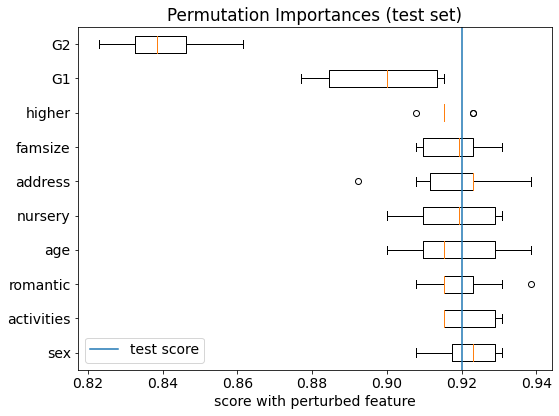

In [71]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1] #order features by how important they are - by how much accuracy score has reduced 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(mean_test_scores,label='test score') #original test score
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

## 3bii. SHAP

In [72]:
grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_svc(X,y,42, 5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

0.9170836445108289
0.9153846153846154
{'svc__C': 10000, 'svc__gamma': 0.001}


In [73]:
# save the output so I can use it later
fname = '../results/allpor/svc/allpor_svc_use'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

In [74]:
# load saved data
import pickle
fname = '../results/allmath/svc/allmath_svc_use'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [75]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer
explainer = shap.KernelExplainer(grid.best_estimator_[1].predict, X_test_transformed)
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
#calculate shap values
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))

Using 130 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


(79, 47)



(79, 47)


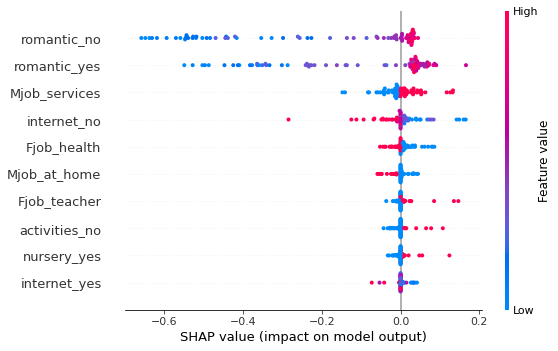

In [76]:
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, max_display=10)

In [77]:
index = 0 # the index of the point to explain
print(explainer.expected_value) # we explain user 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names)

0.9153846153846155


In [78]:
index = 25 # the index of the point to explain
print(explainer.expected_value) # we explain user 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names)

0.9153846153846155


In [79]:
index = 50 # the index of the point to explain
print(explainer.expected_value) # we explain user 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names)

0.9153846153846155


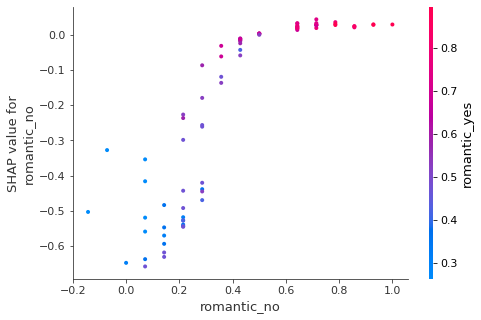

In [80]:
ftr = 'romantic_no'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names)

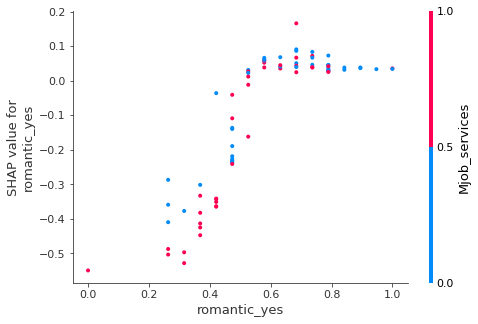

In [81]:
ftr = 'romantic_yes'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names)

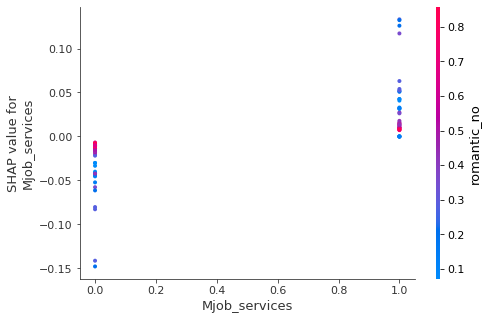

In [82]:
ftr = 'Mjob_services'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names)

## 3c. CONFUSION MATRIX

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [86]:
# load saved data
import pickle
fname = '../results/allpor/svc/allpor_svc_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

confusion matrix : [[ 15   2]
 [  2 111]]


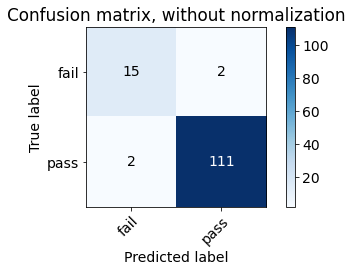

normalized confusion matrix : [[0.88235294 0.11764706]
 [0.01769912 0.98230088]]


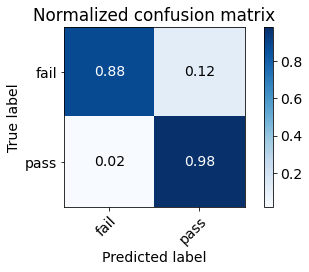

In [87]:
y_pred = grid.best_estimator_.predict(X_test)
# not-normalized
conf_mat = confusion_matrix(y_test, y_pred)
print("confusion matrix :", conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'])
plt.show()

# normalized
norm_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("normalized confusion matrix :",norm_conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'],normalize= True )
plt.show()